In [40]:
a, b, c = 11, 5, 23

s = set()
stack = [(0, 0, 23)]
answer = set()
while stack:
    out = stack.pop()
    if out[0] == 0:
        answer.add(out[2])
    before = len(s)
    s.add(out)
    after = len(s)
    if before == after:
        continue
    else:
        if a != 0:
            ab = (out[1] + out[0] - min(b, out[1] + out[0]), min(b, out[1] + out[0]), out[2])
            ac = (out[2] + out[0] - min(c, out[2] + out[0]), out[1], min(c, out[2] + out[0]))
            stack.append(ab)
            stack.append(ac)
        if b != 0:
            ba = (min(a, out[1] + out[0]), out[0] + out[1] - min(a, out[1] + out[0]), out[2])
            bc = (out[0], out[1] + out[2] - min(c, out[2] + out[1]), min(c, out[2] + out[1]))
            stack.append(ba)
            stack.append(bc)
        if c != 0:
            ca = (min(a, out[2] + out[0]), out[1], out[2] + out[0] - min(a, out[2] + out[0]))
            cb = (out[0], min(b, out[2] + out[1]), out[1] + out[2] - min(b, out[2] + out[1]))
            stack.append(cb)
            stack.append(ca)

for num in sorted(answer):
    print(num, end = ' ')

18 19 20 21 22 23 

In [2]:
# !pip install opencv-python

In [11]:
# 2. 네이버에 '하나은행'과 관련된 뉴스 기사를 검색하여, 상위 40개의 뉴스 기사의 제목과 내용을 수집하시오. 

import pyautogui
import pyperclip
import time
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By

In [12]:
driver = webdriver.Chrome()
driver.get('https://www.naver.com')
time.sleep(2)

In [13]:
# 특정 이미지를 찾아 해당 이미지의 좌표를 찾아온 뒤 클릭
point_img = pyautogui.locateOnScreen('search1.PNG', confidence = 0.8)
site = pyautogui.center(point_img)
pyautogui.moveTo(site)
time.sleep(1)

# 마우스 커서가 이동한 위치를 클릭 하여 지정된 글을 입력
pyautogui.click()

# pyperclip라이브러리 활요하여 하나은행 검색어 입력
pyperclip.copy('하나은행')
pyautogui.hotkey('ctrl', 'v')
pyautogui.write(['enter'])

In [14]:
# 뉴스 탭 클릭
driver.find_element(By.XPATH, '//*[@id="lnb"]/div[1]/div/div[1]/div/div[1]/div[8]/a').click()

In [ ]:
# 해당 페이지에 스크롤을 계속 내려 띄워진 정보들을 모두 수집
# 스크롤을 약 50회 반복하여 내림
for _ in range(50):
    driver.execute_script('window.scrollTo(0, document.body.scrollHeight);')
    time.sleep(0.5)

In [18]:
# 현재 웹 크롤러에 의해 동작되고 있는 페이지의 html 정보 추출
html = BeautifulSoup(driver.page_source)

# 뉴스 기사 제목 수집
news_title = html.find_all('a', class_='lu8Lfh20c9DvvP05mqBf tym_MoKIfC84Aqvg9SKg')
title_list = [x.get_text() for x in news_title]
context = html.find_all('a', class_='lu8Lfh20c9DvvP05mqBf OmR0jkNgHXA6BZNhMfn2')
context_list = [x.get_text() for x in context]

In [19]:
import pandas as pd


df1 = pd.DataFrame(data={'제목': title_list, '내용': context_list})

- 자연어 처리 라이브러리 설치
  1. java jdk 프로그램 설치
     - https://www.oracle.com/kr/java/technologies/downloads/
    
  2. 환경 변수 설정

In [20]:
# !pip install Jpype1
# !pip install konlpy

In [21]:
from konlpy.tag import Okt

In [22]:
# 한국어 문장에서 형태소(POS, 말의 가장 작은 단위)를 찾아, 형태소 단위로 분해
okt = Okt()

In [27]:
# okt 함수를 활용하여, 형태소 분석 수행
# 형태소 분석 -> 토큰화 -> 품사 부착
text1 = df1['제목'].values.tolist()[1]
pd.DataFrame(okt.pos(text1))

,0,1
0,기보,Noun
1,·,Punctuation
2,하나은행,Noun
3,",",Punctuation
4,호남,Noun
5,기술,Noun
6,중소기업,Noun
7,금융,Noun
8,지원,Noun
9,맞,Verb


In [28]:
df_pos = pd.DataFrame()
for i in range(len(df1['제목'])):
    text = df1['제목'].values.tolist()[i]
    pos_n = pd.DataFrame(okt.pos(text))
    df_pos = pd.concat([df_pos, pos_n])

df_pos

,0,1
0,하나은행,Noun
1,74억원,Number
2,부당,Noun
3,대출,Noun
4,발생,Noun
...,...,...
9,오피스,Noun
10,세미나,Noun
11,’,Punctuation
12,첫,Noun


In [31]:
df_pos[1].value_counts()

1
Noun           4292
Punctuation    1295
Number          312
Josa            249
Foreign         121
Verb            103
Alpha            95
Modifier         82
Adjective        38
Suffix           30
Adverb           16
Determiner        4
Name: count, dtype: int64

In [36]:
df2 = df_pos.rename(columns={0:'형태소', 1:'품사'})

cond1 = (df2['품사'] == 'Punctuation')
df2.loc[cond1]

,형태소,품사
5,…,Punctuation
1,·,Punctuation
3,",",Punctuation
0,[,Punctuation
2,],Punctuation
...,...,...
1,",",Punctuation
2,",",Punctuation
8,’,Punctuation
1,",",Punctuation


In [38]:
# 워드 클라우드 시각화 라이브러리 설치
# !pip install wordcloud

from wordcloud import WordCloud

In [40]:
wc = WordCloud(background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(" ".join(df2['형태소']))

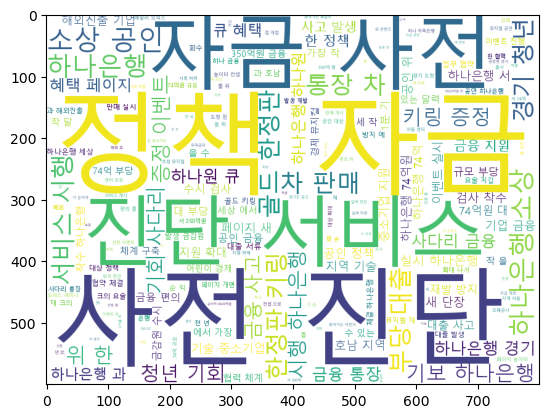

In [42]:
import matplotlib.pyplot as plt

plt.imshow(wc)

In [43]:
# 1. 앞서 수집한 '금융감독원' 기업 평가 데이터를 이용해, 기업 평가를 남긴 사원들의 직무 별 기업추천/비추천 비율을 계산하시오.  
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats

df1 = pd.read_csv('../hanro_test/0428/24_Data.csv')
print(df1.shape)
df1.head(2)

(95, 12)


,Unnamed: 0,part,former,regions,date,text,good,bad,hope,same,recom,help
0,0,교육,전직원,서울,2025. 04 작성,나쁘지않은 근무환경과 동기들의 인성이 좋았습니다.,"장점금융 대기업, 커리어발전에 굉장히 좋은 회사입니다. 슈퍼갑","단점맛있는 밥, 하지만 매번 똑같은 옥상에서의 풍경, 경치가 그리좋지 않아요",경영진에 바라는 점복지를 좀 더 늘려줬으면 합니다. 식대를 좀 지원좀해주세요,1년 후에도 비슷할 것 같아요,기업을 추천해요,1
1,1,전문직,전직원,서울,2025. 03 작성,같이 일하는 사람들이 젠틀하고 사무실 분위기가 아주 좋습니다. 배리굿,장점팀장님이 인간적으로 대해주며 항상 배려해주는 말이 매너가 너무 좋습니다.,단점조용해서 의사소통이 적은 것이 흠이고 상담직이라 점심시간이 촉박하고 시간이 금방...,경영진에 바라는 점직원들간에 의사소통이 더욱 필요하고 직원생일파티 등 적극적인 회사...,1년 후에도 비슷할 것 같아요,기업을 추천해요,0


In [44]:
df1['recom'].unique()

array(['기업을 추천해요', '기업을 추천하지 않아요'], dtype=object)

In [46]:
# 기업 추천 여부 파생변수 생성

def func1(row):
    if row == '기업을 추천해요':
        return '추천'
    else:
        return '비추천'

df1['recom'] = df1['recom'].apply(func1)
df1['recom'].value_counts()

recom
추천     72
비추천    23
Name: count, dtype: int64

In [50]:
# 두 범주형 데이터의 빈도수, 비율
c1 = pd.crosstab(df1['part'], df1['recom'], margins=True)
c1['추천비율'] = c1['추천'] / c1['All']
c1['비추천비율'] = 1 - c1['추천비율']
c1

recom,비추천,추천,All,추천비율,비추천비율
part,,,,,
개발,0,4,4,1.000000,0.000000
교육,0,2,2,1.000000,0.000000
금융/재무,9,29,38,0.763158,0.236842
기획/경영,4,11,15,0.733333,0.266667
데이터,0,1,1,1.000000,0.000000
마케팅/시장조사,0,1,1,1.000000,0.000000
미디어/홍보,1,6,7,0.857143,0.142857
법률/법무,1,5,6,0.833333,0.166667
서비스/고객지원,1,6,7,0.857143,0.142857


In [51]:
# 2. 실제로 직무에 따른 기업 추천/비추천의 연관성이 있는지 가설검정을 수행하시오.
# 리뷰에 참여한 직원들이 5명 이상인 경우만 추출하여 확인
df2 = c1.loc[c1['All'] >= 5]
df2

recom,비추천,추천,All,추천비율,비추천비율
part,,,,,
금융/재무,9,29,38,0.763158,0.236842
기획/경영,4,11,15,0.733333,0.266667
미디어/홍보,1,6,7,0.857143,0.142857
법률/법무,1,5,6,0.833333,0.166667
서비스/고객지원,1,6,7,0.857143,0.142857
특수계층/공공,3,3,6,0.500000,0.500000
All,23,72,95,0.757895,0.242105


In [54]:
# 가설 수립
# (x-범주형, y-범주형) 두 항목 간 비율의 유의미한 차이가 있는지
# 귀무가설: 두 범주형 항목은 서로 독립이다. (연관성이 없다, 비율의 차이가 없다고 볼 수 있다.)
# 대립가설: 두 범주형 항목은 서로 독립이 아니다. (연관성이 있다.)

# chi2_contingency() 검정 함수는 데이터의 빈도수 값을 받아 가설검정을 수행
# 맨 마지막에 붙은 all은 제거
stats.chi2_contingency(df2.iloc[:-1][['추천', '비추천']]).pvalue
# 귀무가설 참 -> 두 항목은 서로 독립이다.

np.float64(0.6721415487072684)

In [59]:
# 3. 기업을 추천하는 사원들의 데이터만 뽑아, 해당 인원들이 작성한 기업장점 데이터를 워드 클라우드로 시각화 하시오.
from konlpy.tag import Okt

okt = Okt()

df1_good = df1.loc[df1['recom'] == '추천']
good_list = df1_good['good'].values.tolist()
df_pos = pd.DataFrame()

for i in range(len(good_list)):
    df_n = pd.DataFrame(okt.pos(good_list[i]))
    df_pos = pd.concat([df_n, df_pos])

In [61]:
df_pos2 = df_pos.rename(columns={0:'형태소', 1:'품사'})
df_pos3 = df_pos2.loc[df_pos2['품사'] == 'Noun']

In [63]:
# 불용어 처리(stopword): 자연어 처리에 있어 불필요한 접속사, 조사, 관사 등 의미가 없는 단어
# 제거 할 불용어를 리스트 형태로 구성하여 제거
stopword_list = ['수', '것', '해주', '장점', '이']
df_clean = df_pos3.loc[~df_pos3['형태소'].isin(stopword_list)]

wc = WordCloud(background_color='white', width=800, height=600, font_path='Malgun.ttf').generate(" ".join(df_clean['형태소']))

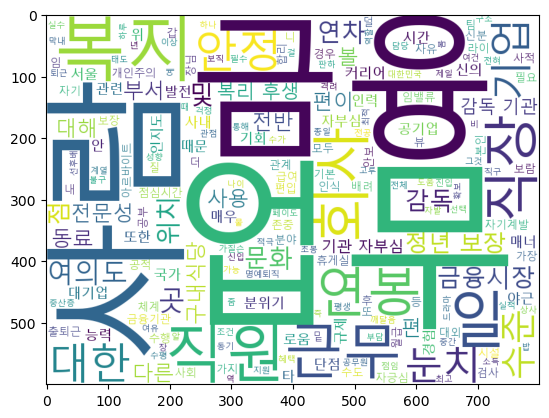

In [64]:
import matplotlib.pyplot as plt

plt.imshow(wc)

In [ ]:
# 4. 기업을 추천하지 않는 사원들의 데이터만 뽑아, 해당 인원들이 작성한 기업 단점 데이터를 워드클라우드로 시각화 하시오.


In [66]:
# 5. 추천수를 가장 많이 받은 상위 10개의 데이터를 뽑아, 현직자와 아닌 사원들의 수를 확인하시오.

df2 = df1.sort_values(by='help', ascending=False).head(10)
df2['former'].value_counts()

former
현직원    6
전직원    4
Name: count, dtype: int64

In [70]:
# 6. 경영진에게 바라는 희망사항에서 가장 많이 등장한 명사 5가지를 찾으시오 (관사 및 부사 제외)

hope_list = df1['hope'].values.tolist()
df_pos = pd.DataFrame()
for i in range(len(hope_list)):
    dfn = pd.DataFrame(okt.pos(hope_list[i]))
    df_pos = pd.concat([dfn, df_pos])

df_pos

,0,1
0,경,Modifier
1,영진,Noun
2,에,Josa
3,바라는,Verb
4,점,Noun
...,...,...
14,좀,Noun
15,지,Modifier
16,원,Modifier
17,좀,Noun


In [72]:
cond1 = (df_pos[1] == 'Noun')
cond2 = df_pos[0].isin(['영진', '점', '수', '것', '더', '좀'])
df_pos.loc[cond1 & ~cond2][0].value_counts().head(5)

0
직원    32
업무    14
일     14
조직     9
생각     9
Name: count, dtype: int64

# 13. 데이터 마이닝

- 기계학습(ML): 컴퓨터가 데이터 간 관계를 학습하여, 새로운 수식을 도출하는 분석 기법
- 기계학습의 핵심 포인트:
  1. 학습 능력: 컴퓨터가 데이터를 얼마나 잘 학습하여 수식을 도출하는가?
  2. 일반화 능력: 새로운 데이터가 들어왔을 때, 얼마나 수식이 잘 예측하는가?
- 기계학습의 3요소
  1. 데이터(교과서): 학습의 목적에 맞게 데이터를 깔끔하게 다듬는 작업이 필요
     - 특성 공학: 학습이 잘 될 수 있도록 데이터를 다듬는 전처리 기법
    
  2. 알고리즘(선생님): 학습의 목적과 데이터의 특성에 맞게 알고리즘을 선택
 
     - 알고리즘: 선형회귀분석(최소제곱법), 의사결정나무, 앙상블, svm, 신경망, ...
 
  3. 하드웨어(학생): 학습을 수행하는데 필요한 컴퓨터 처리 능력(cpu, gpu, ...)
 
     - 비용 cost

## 13-1. 기계학습 종류

- 기계학습의 종류:
  - 1. 지도학습: 목표변수(y)와 설명변수(x)의 관계를 학습해서, 새로운 x가 들어올 때, y를 예측 및 분류
       - 회귀(regression, y-연속형): 특정 값을 최대한 가깝게 예측하는 것이 목적
       - 분류(classification, y-범주형): 특정 항목인지 아닌지를 정확하게 분류하는 것이 목적
       - y의 타입에 따라 사용하는 지도학습 기법이 다르므로, 평가 지표도 달라짐
   
  - 2. 비지도 학습: 설명변수 데이터 간의 수학적 거리, 유사성, 상관성 등을 이용하여, 비슷한 유형의 데이터를 묶거나, 연관성있는 데이터를 찾거나, 데이터의 차원을 줄이는 등의 학습 기법
       - 군집분석: 비슷한 위치 또는 가까운 위치의 특성이 비슷한 데이터들 끼리 묶어주는 기법
       - 연관분석: 특정 데이터의 유사한 항목을 찾아 묶어주는 기법
       - 차원 축소: 특정 데이터의 column(항목)들을 줄이는 기법
       - 장바구니 분석, 추천시스템...
   
  - 3. 강화학습: 컴퓨터 시뮬레이션을 통해, 사용자가 설정한 환경에 대하여 적절한 보상이 주어지는 방향으로 학습하는기법
       - 게임 ai, 데이터가 없이 학습이 가능한 학습 기법

## 13-2. 지도학습 절차

- 지도 학습의 절차 6단계:
  1. 데이터 핸들링(데이터를 불러오기, 파생변수 생성, 층별화, 병합, 재구조화): 데이터의 구조적인 관점에서 학습을 수행 할 수 있는 형태로 데이터 셋을 구성하는 과정
  2. 학습의 목표변수(y)와 설명변수(x)를 지정
     - 유의 사항: 사용되는 x는 새로 들어올 데이터에 대한 값으로 설정
    
  3. 학습 데이터(train set)와 검증 데이터 분할
     - validation set: 교차 검증에 사용되는 데이터 셋
     - test set: 학습에 참여하지 않음
  4. 학습 수행
     - 특성 공학(결측값 대치, 스케일링, 인코딩, 교차검증, 차원축소, 특성 추출, 불균형 데이터 처리, ...)
     - 학습
  5. 학습 된 모델의 성능 평가
     - 학습 성능: 학습을 알고리즘이 얼마나 잘 수행해 냈는가?
     - 일반화 성능: 새로 들어올 데이터에 대해 얼마나 잘 예측, 분류를 수행하는가?
  6. 새로운 데이터 입력
     - 학습 된 모델을 구조화

In [73]:
df1 = pd.read_csv('data/01_Data.csv')
print(df1.shape)
df1.head(2)

(51301, 20)


,Unnamed: 0,Index,Member_ID,Sales_Type,Contract_Type,Channel,Datetime,Term,Payment_Type,Product_Type,Amount_Month,Customer_Type,Age,Address1,State,Overdue_count,Overdue_Type,Gender,Bank,Credit_Score
0,0,1,66758234,렌탈,일반계약,영업방판,2022-05-09,60,CMS,SLX-1,96900,개인,42.0,경기도,계약확정,0,없음,여자,새마을금고,496.0
1,1,2,66755948,렌탈,교체계약,영업방판,2023-02-23,60,카드이체,SLX-1,102900,개인,39.0,경기도,계약확정,0,없음,남자,현대카드,876.0


In [87]:
# 탈퇴 분류 모델을 생성(신규 고객의)
# 1. 데이터 핸들링
df1['State'].unique()

array(['계약확정', '기간만료', '해약확정', '해약진행중'], dtype=object)

In [89]:
# 계약 해지 고객들 -> 1, 정상고객 -> 0바꾸어 처리'
df1['target'] = df1['State'].replace({'기간만료':1, '해약확정': 1, '해약진행중':1, '계약확정':0})
df1['target'].value_counts()

C:\Users\leedo\AppData\Local\Temp\ipykernel_15320\700366743.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['target'] = df1['State'].replace({'기간만료':1, '해약확정': 1, '해약진행중':1, '계약확정':0})


target
0    50620
1      681
Name: count, dtype: int64

In [90]:
df2 = df1.dropna()

In [91]:
# 2. 목표변수와 설명변수를 선언
x = df2[['Age', 'Credit_Score', 'Term', 'Amount_Month']]
y = df2['target']

In [92]:
# 3. 학습 데이터와 검증 데이터 분할
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y)
print(x_train.shape)
print(x_test.shape)

(30447, 4)
(10150, 4)


In [94]:
# 4. 학습을 실시
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [95]:
# 5. 성능 확인
from sklearn.metrics import accuracy_score
# 정확도: 전체 데이터에서 얼만큼 정확하게 분류했는지 측정

# 예측값 계산
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# 학습 성능 평가 
accuracy_score(y_train, y_train_pred)

0.9859427858245475

In [96]:
# 일반화 성능 평가
accuracy_score(y_test, y_test_pred)


0.9886699507389163

In [97]:
# 6. 배포
import pickle

# 앞서 학습한 모델을 파일 형태로 저장
pickle.dump(model, open('model.sav', 'wb'))

In [98]:
# 저장한 파일 호출
new_model = pickle.load(open('model.sav', 'rb'))
new_model

LogisticRegression()